The ultimate aim of optimizing retail prices is to charge a price that helps you make the most money and attracts enough customers to buy your products

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('retail_price.csv')
df.head(10).T

0               1               2  \
product_id                            bed1            bed1            bed1   
product_category_name       bed_bath_table  bed_bath_table  bed_bath_table   
month_year                      01-05-2017      01-06-2017      01-07-2017   
qty                                      1               3               6   
total_price                          45.95          137.85           275.7   
freight_price                         15.1       12.933333           14.84   
unit_price                           45.95           45.95           45.95   
product_name_lenght                     39              39              39   
product_description_lenght             161             161             161   
product_photos_qty                       2               2               2   
product_weight_g                       350             350             350   
product_score                          4.0             4.0             4.0   
customers                               57              61             123   
weekday                                 23              22              21   
weekend                                  8               8              10   
holiday                                  1               1               1   
month                                    5               6               7   
year                                  2017            2017            2017   
s                                10.267394        6.503115       12.071651   
volume                                3800            3800            3800   
comp_1                                89.9            89.9            89.9   
ps1                                    3.9             3.9             3.9   
fp1                              15.011897       14.769216       13.993833   
comp_2                               215.0           209.0           205.0   
ps2                                    4.4             4.4             4.4   
fp2                                   8.76          21.322       22.195932   
comp_3                               45.95           45.95           45.95   
ps3                                    4.0             4.0             4.0   
fp3                                   15.1       12.933333           14.84   
lag_price                             45.9           45.95           45.95   

                                         3               4               5  \
product_id                            bed1            bed1            bed1   
product_category_name       bed_bath_table  bed_bath_table  bed_bath_table   
month_year                      01-08-2017      01-09-2017      01-10-2017   
qty                                      4               2               3   
total_price                          183.8            91.9          137.85   
freight_price                      14.2875            15.1            15.1   
unit_price                           45.95           45.95           45.95   
product_name_lenght                     39              39              39   
product_description_lenght             161             161             161   
product_photos_qty                       2               2               2   
product_weight_g                       350             350             350   
product_score                          4.0             4.0             4.0   
customers                               90              54              50   
weekday                                 23              21              22   
weekend                                  8               9               9   
holiday                                  1               1               2   
month                                    8               9              10   
year                                  2017            2017            2017   
s                                 9.293873        5.555556        8.333333   
volume                                3800            3800    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

- Shape of the Dataset

In [10]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 30
Samples: 676


- Checking for NA values

In [12]:
any(df.isna().sum() > 0)

False

- Some Stats ...

In [13]:
df.describe().T

count          mean          std          min  \
qty                         676.0     14.495562    15.443421     1.000000   
total_price                 676.0   1422.708728  1700.123100    19.900000   
freight_price               676.0     20.682270    10.081817     0.000000   
unit_price                  676.0    106.496800    76.182972    19.900000   
product_name_lenght         676.0     48.720414     9.420715    29.000000   
product_description_lenght  676.0    767.399408   655.205015   100.000000   
product_photos_qty          676.0      1.994083     1.420473     1.000000   
product_weight_g            676.0   1847.498521  2274.808483   100.000000   
product_score               676.0      4.085503     0.232021     3.300000   
customers                   676.0     81.028107    62.055560     1.000000   
weekday                     676.0     21.773669     0.986104    20.000000   
weekend                     676.0      8.658284     0.705600     8.000000   
holiday                     676.0      1.494083     0.940430     0.000000   
month                       676.0      6.192308     3.243455     1.000000   
year                        676.0   2017.525148     0.499737  2017.000000   
s                           676.0     14.644970    11.930276     0.484262   
volume                      676.0  10664.627219  9172.801850   640.000000   
comp_1                      676.0     79.452054    47.933358    19.900000   
ps1                         676.0      4.159467     0.121652     3.700000   
fp1                         676.0     18.597610     9.406537     0.095439   
comp_2                      676.0     92.930079    49.481269    19.900000   
ps2                         676.0      4.123521     0.207189     3.300000   
fp2                         676.0     18.620644     6.424174     4.410000   
comp_3                      676.0     84.182642    47.745789    19.900000   
ps3                         676.0      4.002071     0.233292     3.500000   
fp3                         676.0     17.965007     5.533256     7.670000   
lag_price                   676.0    107.399684    76.974657    19.850000   

                                    25%          50%           75%       max  
qty                            4.000000    10.000000     18.000000    122.00  
total_price                  333.700000   807.890000   1887.322500  12095.00  
freight_price                 14.761912    17.518472     22.713558     79.76  
unit_price                    53.900000    89.900000    129.990000    364.00  
product_name_lenght           40.000000    51.000000     57.000000     60.00  
product_description_lenght   339.000000   501.000000    903.000000   3006.00  
product_photos_qty             1.000000     1.500000      2.000000      8.00  
product_weight_g             348.000000   950.000000   1850.000000   9750.00  
product_score                  3.900000     4.100000      4.200000      4.50  
customers                     34.000000    62.000000    116.000000    339.00  
weekday                       21.000000    22.000000     23.000000     23.00  
weekend                        8.000000     9.000000      9.000000     10.00  
holiday                        1.000000     1.000000      2.000000      4.00  
month                          3.000000     6.000000      8.000000     12.00  
year                        2017.000000  2018.000000   2018.000000   2018.00  
s                              7.510204    11.316760     17.745704    100.00  
volume                      3510.000000  8000.000000  15750.000000  32736.00  
comp_1                        49.910000    69.900000    104.256549    349.90  
ps1                            4.100000     4.200000      4.200000      4.50  
fp1                           13.826429    16.618984     19.732500     57.23  
comp_2                        53.900000    89.990000    117.888889    349.90  
ps2                            4.100000     4.200000      4.200000      4.40  
fp2                           14.485000    16.811765  

#### Exploratory Data Analysis

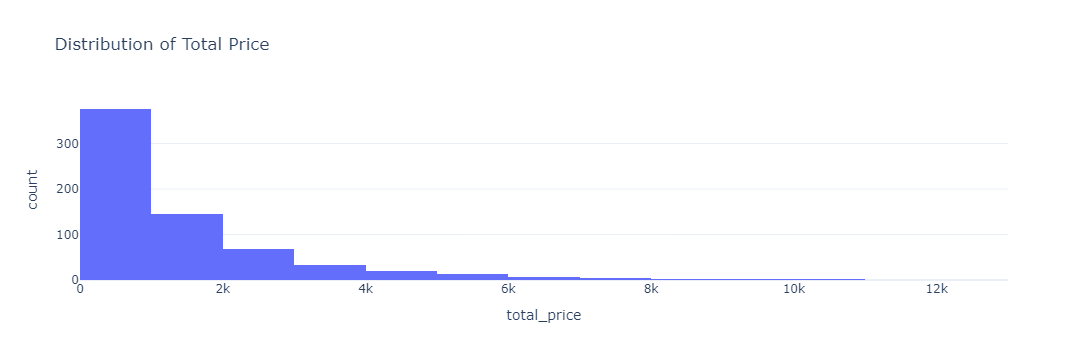

In [14]:
fig = px.histogram(df,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

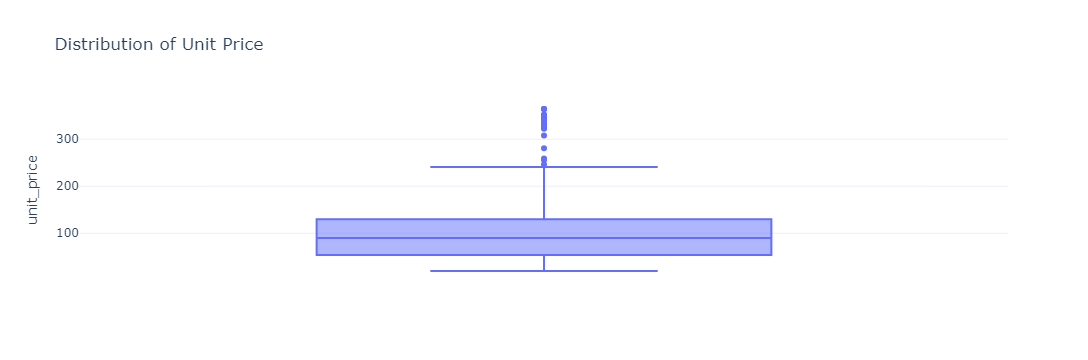

In [15]:
fig = px.box(df,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

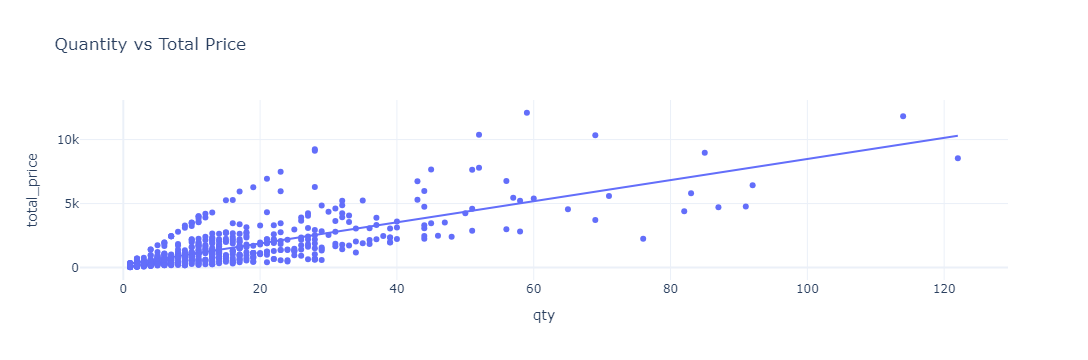

In [16]:
fig = px.scatter(df,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

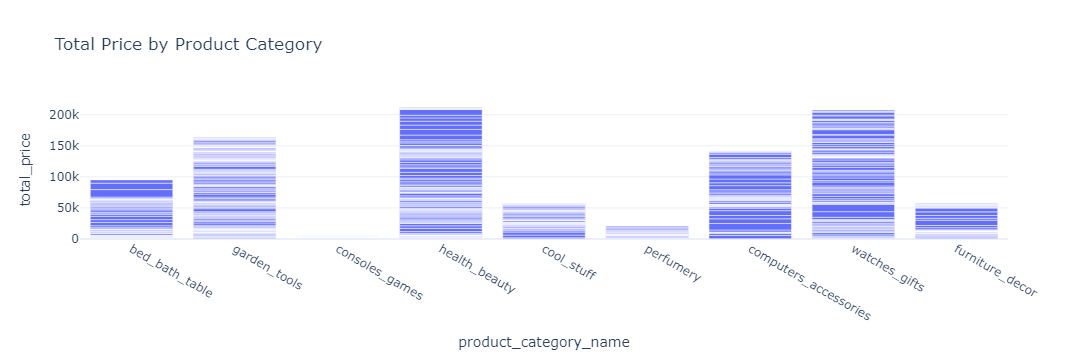

In [17]:
fig = px.bar(df, x='product_category_name',
             y='total_price', title='Total Price by Product Category')
fig.show()

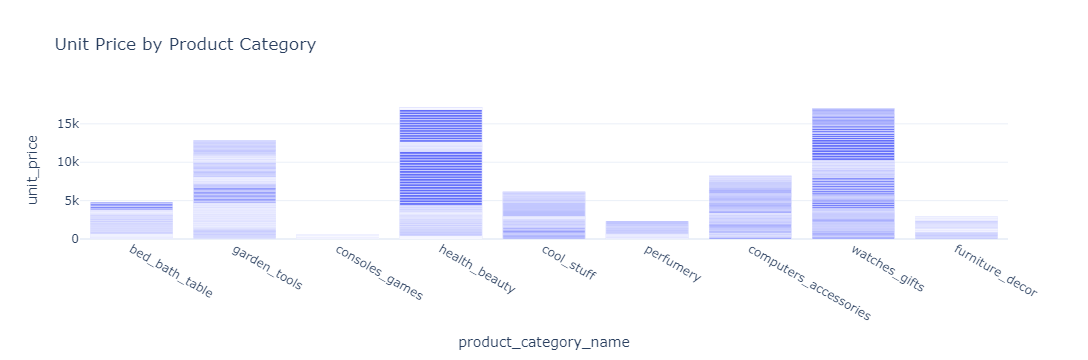

In [18]:
fig = px.bar(df, x='product_category_name',
             y='unit_price', title='Unit Price by Product Category')
fig.show()

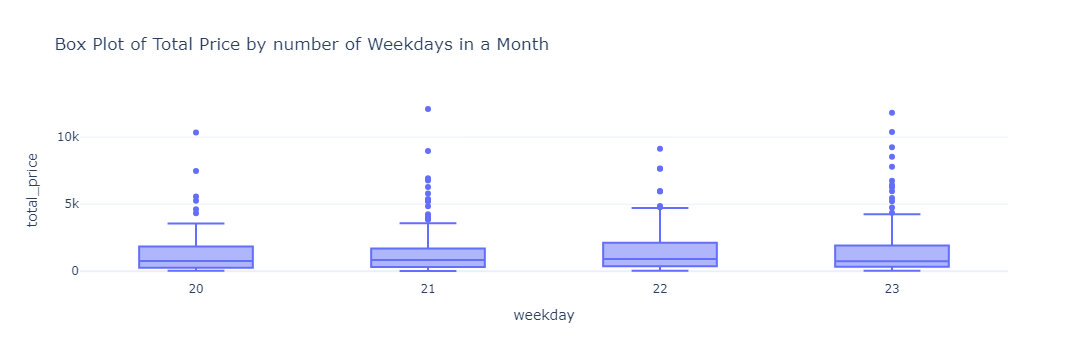

In [19]:
fig = px.box(df, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

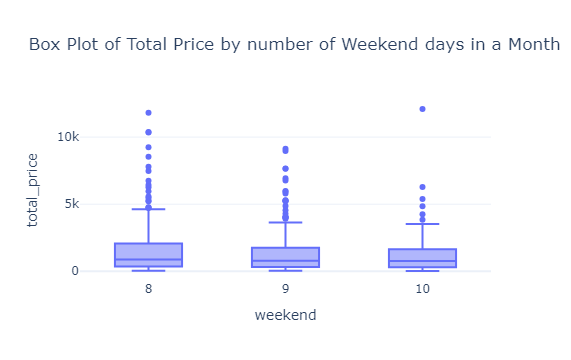

In [20]:
fig = px.box(df, x='weekend', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

- Comparison with Competitor Products

Price

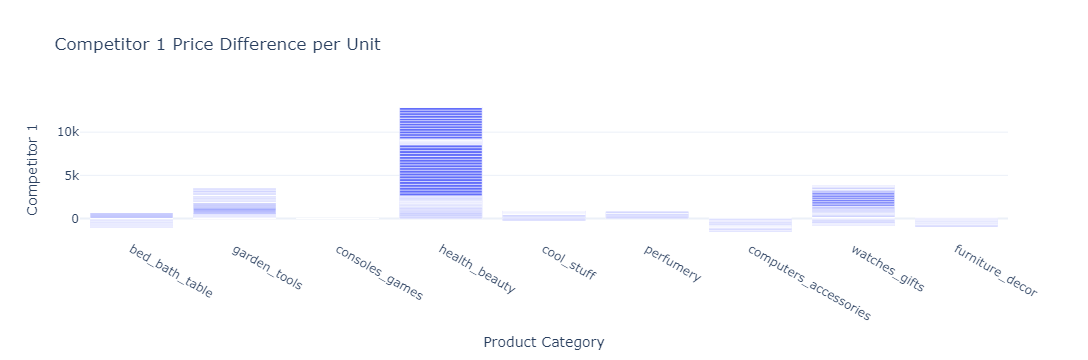

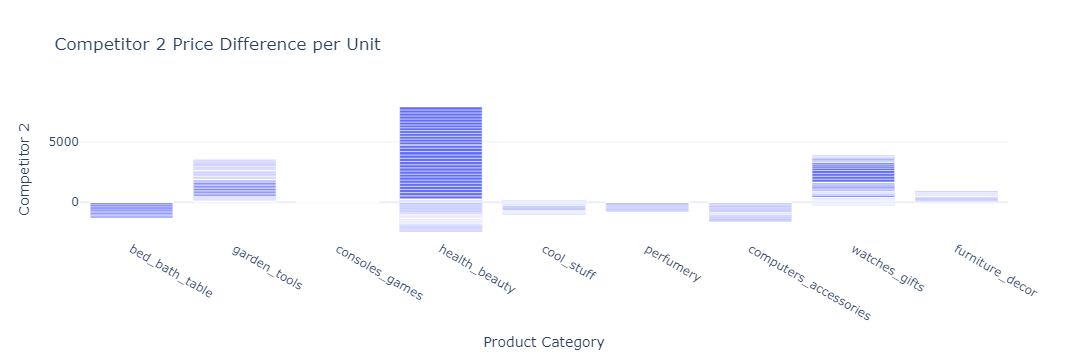

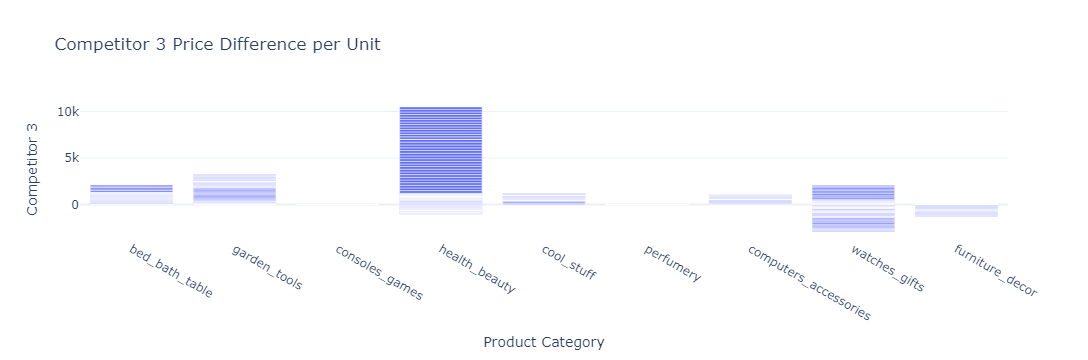

In [21]:
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()


Freight Price

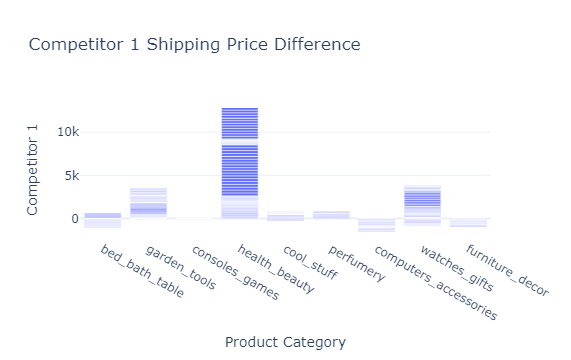

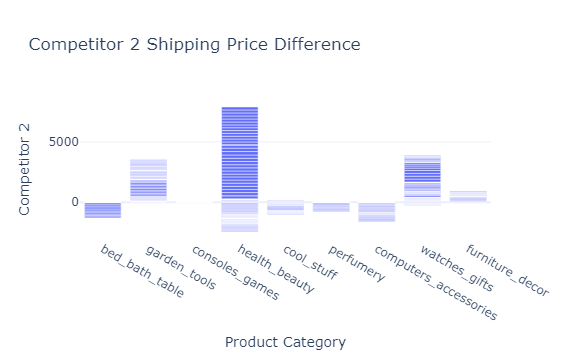

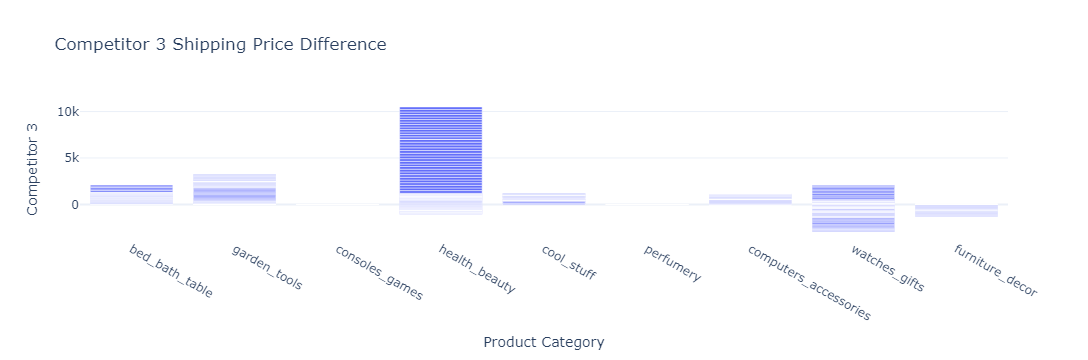

In [22]:
df['fp1_diff'] = df['freight_price'] - df['fp1']
df['fp2_diff'] = df['freight_price'] - df['fp2']
df['fp3_diff'] = df['freight_price'] - df['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

- Correlation Analysis with Unit Price

In [23]:
corrs = df.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

ValueError: could not convert string to float: 'bed1'

In [24]:
non_numerical_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numerical columns:", non_numerical_columns)


Non-numerical columns: Index(['product_id', 'product_category_name', 'month_year'], dtype='object')


In [25]:
df_numeric = df.drop(columns=['product_id', 'product_category_name', 'month_year'])

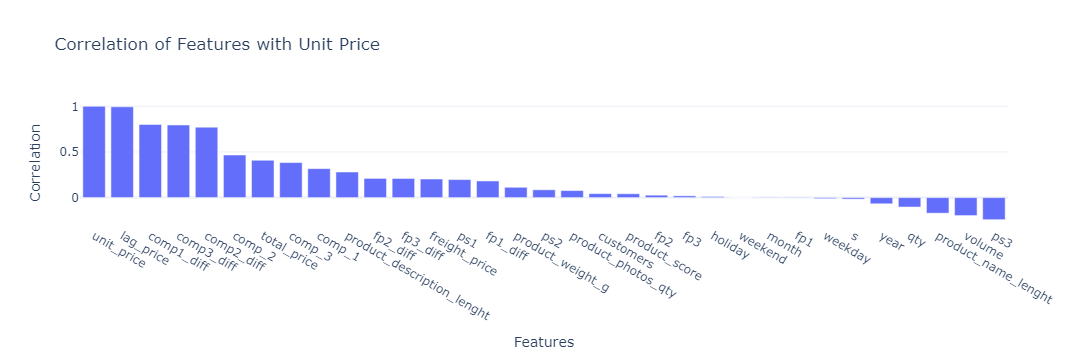

In [28]:
corrs = df_numeric.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })

# Show the plot
fig.show()

- Month-wise Sales Analysis

In [29]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [30]:
monthly_df.head()

month_year  unit_price  total_price  freight_price  qty  weekday  weekend  \
0 2017-01-01  207.445000      2864.19      33.961250    9       44       18   
2 2017-02-01  127.827143      3584.11     217.847838   35      180       72   
4 2017-03-01  122.586615     10204.38     282.314965  101      299      104   
6 2017-04-01  119.288667     11524.62     335.440132  121      300      150   
8 2017-05-01  104.785769     21843.33     393.828633  222      460      160   

   customers  
0         18  
2         78  
4        242  
6        309  
8        803

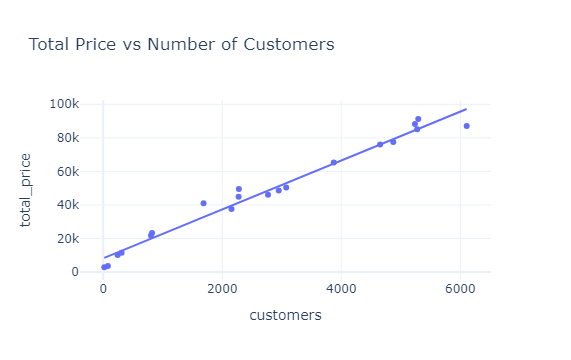

In [31]:
fig = px.scatter(monthly_df,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

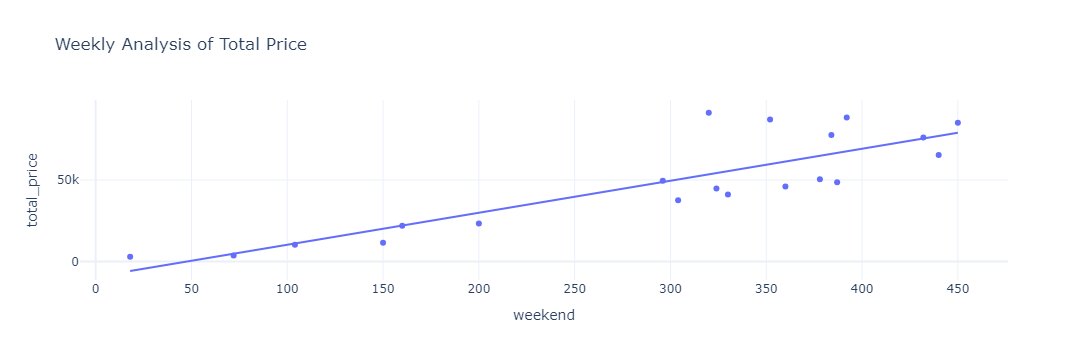

In [32]:
fig = px.scatter(monthly_df,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

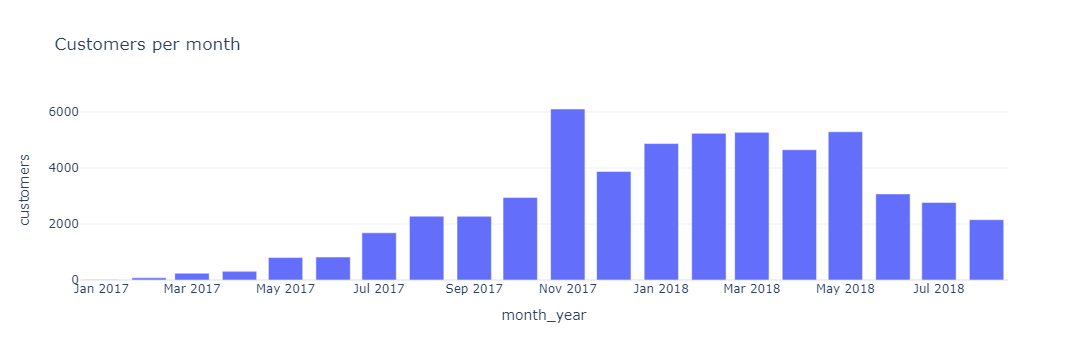

In [33]:
fig = px.bar(monthly_df,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

#### Feature Engineering

- Creating an aggregated dataframe by products

> - Features like total_price, number of customers are aggregated by their sum
> - Others, such as competitor differences, product score, unit price, are all aggregated by thier mean
> - Some of the features get dropped based on the Correlation Analysis results

In [43]:
cols_to_mean = ['product_id', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]

- Aggregating the dataframes separately, based on type

In [44]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

- Join the dataframes

In [45]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products.head()

product_id  total_price  freight_price  customers  comp1_diff  comp2_diff  \
0       bed1      5831.77     240.410762        915  -43.976523  -47.634907   
1       bed2     42938.66     324.204152        968    0.000000  -28.547817   
2       bed3     10304.96     172.316049        530    7.599892    0.000000   
3       bed4      6011.77     151.576305        515  -38.826174    0.000000   
4       bed5     29997.36      96.015504        385  108.481703    0.000000   

   comp3_diff  fp1_diff  fp2_diff  fp3_diff  product_score  unit_price  
0    0.000000 -2.629416 -1.484667  0.000000            4.0   42.211989  
1   37.032861  0.000000 -0.989857  2.214245            3.9   86.774536  
2   51.588471 -2.996105  0.000000  0.378738            3.3   92.101364  
3    6.085263 -3.644118  0.000000 -0.023987            4.2   46.725444  
4  152.431703  3.761456  0.000000  4.750934            4.4  198.381703

- Features and Target

In [46]:
X, y = products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']

#### Model Building

Retail price optimization can be tackled as a regression problem, where the objective is to predict the optimal price for a given product, based on various factors such as product features, competitor prices, and customer behavior

- RandomForestRegressor

In [47]:
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)

- Evaluate the model

In [48]:
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9653993851444929


In [49]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 10.038151266352664


In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [53]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=40),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_scaled, y)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [55]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validation MAE: {mean_cv_score}")

Mean Cross-Validation MAE: 42.53692214746621


In [67]:
# Final predictions
y_pred = best_model.predict(X_scaled)

In [68]:
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9686576790497758


In [69]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 9.640825376628404


- Visualizing Results

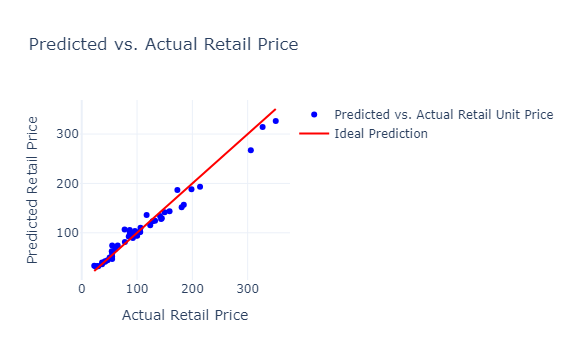

In [70]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

#### Model Explainability

Model explainability is the ability to understand and interpret how a machine learning model arrives at its predictions or decisions

understand how the involved features are helping the model get better- or worse

- Permutation Importance

> technique for measuring the importance of features in a machine learning model. It works by shuffling the values of a single feature in the test set and measuring the decrease in performance of the model

> feature which is important for the model's prediction should have a greater impact on the model's performance when its values are randomly permuted

In [74]:
from sklearn.inspection import permutation_importance

In [82]:
# Compute permutation importance
result = permutation_importance(model, X, y, n_repeats=10, random_state=1)

# Create a DataFrame with the importance and standard deviation
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean,
    'std_dev': result.importances_std
})

# Sort by importance and print the result
importance_df = importance_df.sort_values(by='importance', ascending=False)

In [83]:
importance_df

feature  importance   std_dev
0    total_price    0.248087  0.035796
4     comp2_diff    0.167583  0.025535
3     comp1_diff    0.126763  0.023270
5     comp3_diff    0.102161  0.014223
2      customers    0.027328  0.005083
6       fp1_diff    0.008342  0.001721
7       fp2_diff    0.004121  0.002881
8       fp3_diff    0.003609  0.002332
1  freight_price    0.003353  0.004521
9  product_score    0.003200  0.002093

In [80]:
# Print the headers
print(f"{'Feature':<20} {'Weights':<20}")
print("-" * 40)

# Display the formatted output
for index, row in importance_df.iterrows():
    print(f"{row['feature']:<20} {row['importance']:.4f} ± {row['std_dev']:.4f}")

Feature              Weights             
----------------------------------------
total_price          0.2481 ± 0.0358
comp2_diff           0.1676 ± 0.0255
comp1_diff           0.1268 ± 0.0233
comp3_diff           0.1022 ± 0.0142
customers            0.0273 ± 0.0051
fp1_diff             0.0083 ± 0.0017
fp2_diff             0.0041 ± 0.0029
fp3_diff             0.0036 ± 0.0023
freight_price        0.0034 ± 0.0045
product_score        0.0032 ± 0.0021


- Predictions with Largest and Smallest Error

Using SHAP values to analyze what made the best prediction, the best, and the worst one, the worst. SHAP values break down a prediction to show the impact of each feature

This can help see the effects of each feature on a single prediction

In [85]:
products['unit_price_pred'] = y_pred
products['error'] = abs(products['unit_price'] - products['unit_price_pred'])
products.head()

product_id  total_price  freight_price  customers  comp1_diff  comp2_diff  \
0       bed1      5831.77     240.410762        915  -43.976523  -47.634907   
1       bed2     42938.66     324.204152        968    0.000000  -28.547817   
2       bed3     10304.96     172.316049        530    7.599892    0.000000   
3       bed4      6011.77     151.576305        515  -38.826174    0.000000   
4       bed5     29997.36      96.015504        385  108.481703    0.000000   

   comp3_diff  fp1_diff  fp2_diff  fp3_diff  product_score  unit_price  \
0    0.000000 -2.629416 -1.484667  0.000000            4.0   42.211989   
1   37.032861  0.000000 -0.989857  2.214245            3.9   86.774536   
2   51.588471 -2.996105  0.000000  0.378738            3.3   92.101364   
3    6.085263 -3.644118  0.000000 -0.023987            4.2   46.725444   
4  152.431703  3.761456  0.000000  4.750934            4.4  198.381703   

   unit_price_pred      error  
0        42.475051   0.263062  
1       105.823147  19.048611  
2        97.941407   5.840043  
3        44.437169   2.288275  
4       188.438388   9.943315

In [87]:
max(products['error']), min(products['error'])

(38.38096449999574, 0.2630618724240037)

In [88]:
largest_error = products[products['error'] == max(products['error'])].drop(['product_id'], axis=1)
smallest_error = products[products['error'] == min(products['error'])].drop(['product_id'], axis=1)

> SHAP Values

In [91]:
import shap

In [105]:
data_for_prediction = largest_error  # This should be a single instance or subset of your data

print("-------------------- LARGEST ERROR PREDICTION --------------------\n\n")

# Create a SHAP explainer for your model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the instance with the largest error
shap_values = explainer.shap_values(data_for_prediction)

# Initialize JS visualization for Jupyter Notebook (if needed)
shap.initjs()

# Plot SHAP values
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

-------------------- LARGEST ERROR PREDICTION --------------------




> - The base value (AKA expected value) is the average of the model output over the training data

> - we can see the prediction is much higher than the base value. The Competitor Differences were the major factors that led to such a high prediction. Among these, comp_diff_1 had the highest impact. The competitor difference is high, and positive, which means that the competitors are selling for much lower and the total price is quite low
> - The prediction being much higher than the base value is a strategic decision by the model to ensure profitability. By setting a higher price, the model aims to mitigate the risk of loss due to lower competitor pricing, ensuring that the product's price aligns with the retailer’s profitability goals

In [126]:
data_for_prediction = smallest_error
print("-------------------- SMALLEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

-------------------- SMALLEST ERROR PREDICTION --------------------




> - The prediction is much lower than the base value. The competitor difference is negative (indicating that the competitors were selling at higher prices) and a high value of total_price is the major contributor.
> - The model’s prediction being lower than the base value is a strategic adjustment based on the competitive landscape and the high total price. The negative competitor difference shows that competitors are charging more, and the high total price indicates that a lower price is sufficient to remain competitive and potentially increase sales. Thus, the model suggests a lower price to align with the competitive market conditions and optimize for value while ensuring 

- SHAP Summary Plot

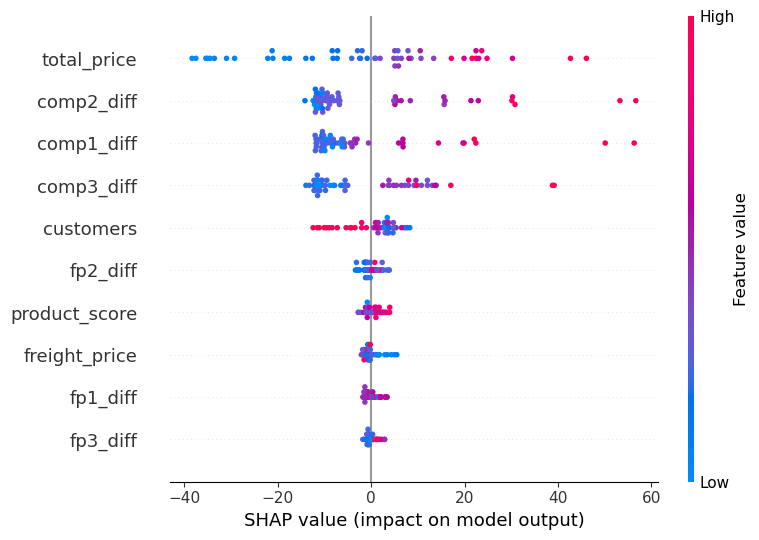

In [127]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

> - **Feature Importance**: The x-axis typically shows the SHAP values, which represent the contribution of each feature to the model's prediction. A larger magnitude of SHAP values means a greater impact on the prediction

> - **Impact Direction**: The plot shows whether a feature value has a positive or negative impact on the prediction. If the SHAP value is positive, the feature increases the prediction, and if negative, it decreases it.

> - **Feature Values**: Each point on the plot represents a single instance of the feature's value. The color of the points often represents the feature value

> - **Point Spread**: The density of points along the y-axis indicates how many instances have similar SHAP values for each feature. A dense area means many instances have similar contributions for that feature